# 다양한 신경망

#### 이미지 전처리
   1. 가로 세로 픽셀 사이즈를 표현하는 해상도 통일
   2. 색을 표현하는 방식 통일 ( RGB, HSV, Gray - scale, Binary,...)

#### MNIST 분류 CNN 모델 예시

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

In [4]:
# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11490434/11490434 [==============================] - 6s 1us/step


In [5]:
# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

In [6]:
print("원본 학습용 이미지 데이터 형태: ",train_images.shape)
print("원본 평가용 이미지 데이터 형태: ",test_images.shape)
print("원본 학습용 label 데이터: ",train_labels)

원본 학습용 이미지 데이터 형태:  (5000, 28, 28)
원본 평가용 이미지 데이터 형태:  (1000, 28, 28)
원본 학습용 label 데이터:  [5 0 4 ... 2 1 2]


Text(0.5, 1.0, 'Training Data Sample')

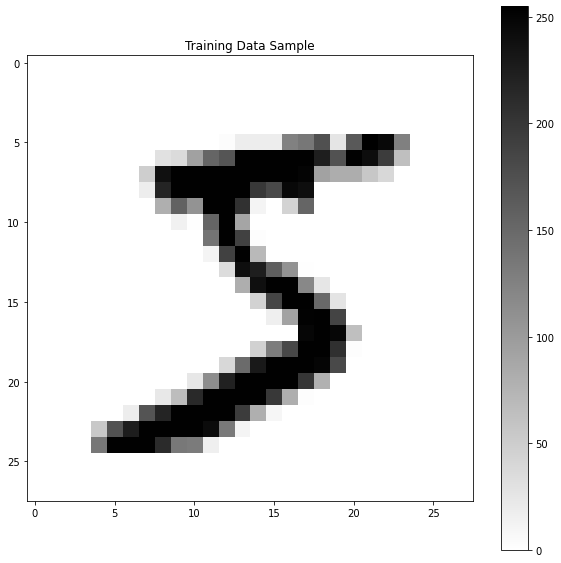

In [8]:
# 첫 번째 샘플 데이터를 출력합니다.
plt.figure(figsize=(10, 10))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title("Training Data Sample")


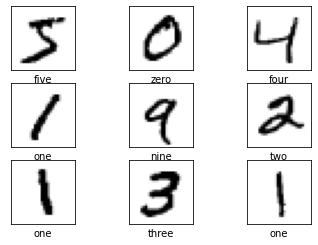

In [9]:
# 9개의 학습용 샘플 데이터를 출력합니다.
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [11]:
# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)

In [12]:
print("변환한 학습용 이미지 데이터 형태: ",train_images.shape)
print("변환한 평가용 이미지 데이터 형태: ",test_images.shape)

변환한 학습용 이미지 데이터 형태:  (5000, 28, 28, 1, 1)
변환한 평가용 이미지 데이터 형태:  (1000, 28, 28, 1)


#### 이미지 처리를 위한 딥러닝 모델

#### 합성곱 신경망 (Convolution Neural Network)
   - 작은 필터를 순환시키는 방식, 이미지의 패턴이 아닌 특징을 중점으로 인식


- 합성곱 신경망 구조 
   - 입력 이미지의 특징을 추출, 분류하는 과정으로 동작

In [13]:
from PIL import Image
from PIL import ImageDraw

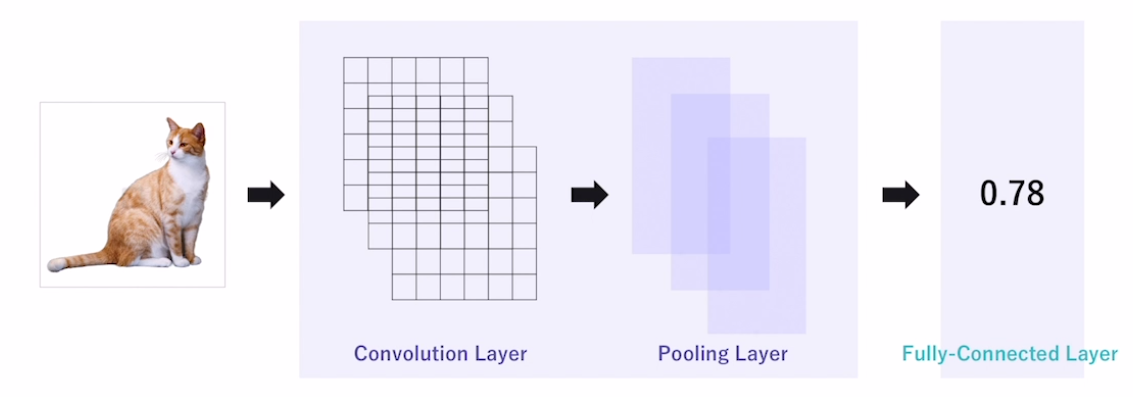

In [19]:
 from IPython.display import Image
 Image('photo/CNN.png')

#### Convolution Layer : 이미지에서 어떠한 특징이 있는지를 구하는 과정, 필터가 이미지를 이동하며 새로운 이미지를 생성


- 피쳐맵의 크기 변형
   - Padding : 원본 이미지의 상하좌우에 한 줄씩 추가
   - Striding : 필터를 이동시키는 거리 설정

#### Pooling Layer : 이미지의 왜곡의 영향(노이즈)를 축소하는 과정


#### Fully Connected Layer : 추출된 특징을 사용하여 이미지를 분류

#### 분류를 위한 Softmax 활성화 함수
- 마지막 계층에 Softmax 활성화 함수 사용
   - a + b + c + d + e + f = 1 
   - a, b, c, d, e, f > 0

#### 정리
 - 합성곱 -> 풀링 -> 활성함수  * 합성곱과 풀링은 n번 반복 가능
 - 반복할 때마다 줄어든 영역에서의 특징을 찾게 되고, 영역의 크기는 작아졌기 때문에 빠른 학습이 가능

#### 합성곱 신경망 기반 다양한 이미지 처리 기술
- Object detection & segmentation
- Super resolution (SR)

#### MNIST 분류 CNN 모델 - 모델 구현 예시

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),#1차원 백터 형식
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# CNN 모델 구조를 출력합니다.
print(model.summary())

# CNN 모델의 학습 방법을 설정합니다.
model.compile(loss = 'sparse_categorical_crossentropy', # 분류
              optimizer = 'adam',
              metrics = ['accuracy'])
              
# 학습을 수행합니다. 
history = model.fit(train_images, train_labels, epochs = 20, batch_size = 512)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

#### MNIST 분류 - MLP vs. CNN

In [34]:
# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
# Train 데이터 5000개와 Test 데이터 500개를 사용합니다.
train_images, train_labels = train_images[:5000].astype(float), train_labels[:5000]
test_images, test_labels = test_images[:500].astype(float), test_labels[:500]

In [36]:
# MLP 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀 * 세로픽셀) 형태로 변환합니다.
train_images = tf.cast(tf.reshape(train_images, (5000, -1)) / 256., tf.float32)
train_labels = tf.convert_to_tensor(train_labels)
test_images = tf.cast(tf.reshape(test_images, (500, -1)) / 256., tf.float32)
test_labels = tf.convert_to_tensor(test_labels)

In [37]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [38]:
# MLP 모델의 학습 방법을 설정합니다.
MLP_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [39]:
# 학습을 수행합니다. 
history = MLP_model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

Epoch 1/10
40/40 - 1s - loss: 1.5479 - accuracy: 0.5782 - 510ms/epoch - 13ms/step
Epoch 2/10
40/40 - 0s - loss: 0.5481 - accuracy: 0.8656 - 90ms/epoch - 2ms/step
Epoch 3/10
40/40 - 0s - loss: 0.3476 - accuracy: 0.9070 - 85ms/epoch - 2ms/step
Epoch 4/10
40/40 - 0s - loss: 0.2809 - accuracy: 0.9246 - 86ms/epoch - 2ms/step
Epoch 5/10
40/40 - 0s - loss: 0.2456 - accuracy: 0.9350 - 85ms/epoch - 2ms/step
Epoch 6/10
40/40 - 0s - loss: 0.2197 - accuracy: 0.9390 - 89ms/epoch - 2ms/step
Epoch 7/10
40/40 - 0s - loss: 0.1976 - accuracy: 0.9472 - 88ms/epoch - 2ms/step
Epoch 8/10
40/40 - 0s - loss: 0.1798 - accuracy: 0.9522 - 81ms/epoch - 2ms/step
Epoch 9/10
40/40 - 0s - loss: 0.1644 - accuracy: 0.9574 - 80ms/epoch - 2ms/step
Epoch 10/10
40/40 - 0s - loss: 0.1464 - accuracy: 0.9624 - 103ms/epoch - 3ms/step


In [40]:
# MLP 모델 구조를 출력합니다. weight의 수가 52,650개입니다.
MLP_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 평가용 데이터를 활용하여 정확도를 평가합니다.
loss, test_acc = MLP_model.evaluate(test_images, test_labels, verbose = 0)

In [42]:
# 모델 평가 및 예측 결과를 출력합니다.
print('\nMLP Test Loss : {:.4f} | MLP Test Accuracy : {}\n'.format(loss, test_acc))


MLP Test Loss : 0.2500 | MLP Test Accuracy : 0.9300000071525574



In [43]:
print('========== CNN ==========')

========== CNN ==========


In [44]:
# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.reshape(train_images, (5000, 28, 28, 1))
test_images = tf.reshape(test_images, (500, 28, 28, 1))

In [45]:
# CNN 모델을 설정합니다.
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [46]:
# CNN 모델의 학습 방법을 설정합니다.
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [47]:
# 학습을 수행합니다. 
history = CNN_model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

Epoch 1/10
40/40 - 3s - loss: 1.5733 - accuracy: 0.5302 - 3s/epoch - 85ms/step
Epoch 2/10
40/40 - 3s - loss: 0.3883 - accuracy: 0.8798 - 3s/epoch - 67ms/step
Epoch 3/10
40/40 - 3s - loss: 0.2232 - accuracy: 0.9358 - 3s/epoch - 65ms/step
Epoch 4/10
40/40 - 3s - loss: 0.1652 - accuracy: 0.9508 - 3s/epoch - 64ms/step
Epoch 5/10
40/40 - 3s - loss: 0.1291 - accuracy: 0.9602 - 3s/epoch - 64ms/step
Epoch 6/10
40/40 - 3s - loss: 0.1090 - accuracy: 0.9680 - 3s/epoch - 63ms/step
Epoch 7/10
40/40 - 3s - loss: 0.0918 - accuracy: 0.9722 - 3s/epoch - 65ms/step
Epoch 8/10
40/40 - 3s - loss: 0.1129 - accuracy: 0.9644 - 3s/epoch - 63ms/step
Epoch 9/10
40/40 - 3s - loss: 0.0669 - accuracy: 0.9798 - 3s/epoch - 64ms/step
Epoch 10/10
40/40 - 3s - loss: 0.0524 - accuracy: 0.9856 - 3s/epoch - 64ms/step


In [48]:
# CNN 모델 구조를 출력합니다. weight의 수가 52,298개입니다.
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 32)        

In [49]:
# 평가용 데이터를 활용하여 정확도를 평가합니다.
loss, test_acc = CNN_model.evaluate(test_images, test_labels, verbose = 0)

In [50]:
# 모델 평가 및 예측 결과를 출력합니다.
print('\nCNN Test Loss : {:.4f} | CNN Test Accuracy : {}'.format(loss, test_acc))


CNN Test Loss : 0.0713 | CNN Test Accuracy : 0.9800000190734863
